Neste projeto, analisaremos o dataset **Ramen Ratings**, disponível no Kaggle, que contém milhares de avaliações de diferentes marcas e estilos de ramen ao redor do mundo.

**Objetivos principais:**
- Investigar quais países produzem os ramens mais bem avaliados;
- Identificar as marcas mais consistentes em qualidade;
- Explorar padrões entre estilo (cup, bowl, pack) e nota;
- Criar visualizações que contem a história dos dados.

In [179]:
import pandas as pd

df = pd.read_csv('/home/marcus-vinicius/Desktop/Python/Kaggle/ramen-ratings.csv')

Conhecendo meus dados:

In [180]:
df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [182]:
# A coluna 'Star' é float porem está como object. Aqui mudamos isso!
df['Stars'] = pd.to_numeric(df['Stars'], errors= 'coerce')
# Deixando o nome das colunas, valores str uniformes
df.columns = df.columns.str.lower().str.replace(' ','_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
# Aqui faço uma limpeza nas str
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')
    df[c] = df[c].str.lower().str.replace('-', '_')

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   review_#  2580 non-null   int64  
 1   brand     2580 non-null   object 
 2   variety   2580 non-null   object 
 3   style     2578 non-null   object 
 4   country   2580 non-null   object 
 5   stars     2577 non-null   float64
 6   top_ten   41 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 141.2+ KB


In [184]:
df.head()

,review_#,brand,variety,style,country,stars,top_ten
0,2580,new_touch,t's_restaurant_tantanmen_,cup,japan,3.75,NaN
1,2579,just_way,noodles_spicy_hot_sesame_spicy_hot_sesame_guan...,pack,taiwan,1.00,NaN
2,2578,nissin,cup_noodles_chicken_vegetable,cup,usa,2.25,NaN
3,2577,wei_lih,gge_ramen_snack_tomato_flavor,pack,taiwan,2.75,NaN
4,2576,ching's_secret,singapore_curry,pack,india,3.75,NaN


In [185]:
# Procurando valores NaN/vazios e fazendo a limpeza
df.isnull().sum()

review_#       0
brand          0
variety        0
style          2
country        0
stars          3
top_ten     2539
dtype: int64

In [186]:
df[df['style'].isnull()]

,review_#,brand,variety,style,country,stars,top_ten
2152,428,kamfen,e_menm_chicken,NaN,china,3.75,NaN
2442,138,unif,100_furong_shrimp,NaN,taiwan,3.00,NaN


Limpeza dos dados:

In [187]:
# A coluna 'style' não tem muita relevancia nesses casos, podemos assim excluir respectivas linhas(2152 e 2442)
df.drop(2152, axis = 0, inplace = True)
df.drop(2442, axis = 0, inplace = True)

In [188]:
df[df['stars'].isnull()]

,review_#,brand,variety,style,country,stars,top_ten
32,2548,ottogi,plain_instant_noodle_no_soup_included,pack,south_korea,NaN,NaN
122,2458,samyang_foods,sari_ramen,pack,south_korea,NaN,NaN
993,1587,mi_e_zee,plain_noodles,pack,malaysia,NaN,NaN


In [189]:
# Conseguimos dessa maneira adicionar o valor mediano 'stars' onde falta com as respectiva marca e país
row_1 = df.loc[(df['brand']=='ottogi') & (df['country']=='south_korea')]
df.loc[32,'stars'] = round(row_1.stars.mean(),2)
df.loc[32]

review_#                                     2548
brand                                      ottogi
variety     plain_instant_noodle_no_soup_included
style                                        pack
country                               south_korea
stars                                        3.34
top_ten                                       NaN
Name: 32, dtype: object

In [190]:
# So repetir o processo e teremos todos os valores 'stars' preenchidos
row_2 = df.loc[(df['brand']=='samyang_foods') & (df['country']=='south_korea')]
df.loc[122,'stars'] = round(row_2.stars.mean(),2)
row_3 = df.loc[(df['brand']=='mi_e_zee') & (df['country']=='malaysia')]
df.loc[993,'stars'] = round(row_3.stars.mean(),2)
df.isnull().sum()

review_#       0
brand          0
variety        0
style          0
country        0
stars          0
top_ten     2537
dtype: int64

In [191]:
df['top_ten'].fillna(0, inplace=True)
# Valores incoerentes/incompletos mesmo tendo preenchido os NaN com 0
df[df['top_ten'] != 0]

,review_#,brand,variety,style,country,stars,top_ten
616,1964,mama,instant_noodles_coconut_milk_flavour,pack,myanmar,5.00,2016_#10
633,1947,prima_taste,singapore_laksa_wholegrain_la_mian,pack,singapore,5.00,2016_#1
655,1925,prima,juzz's_mee_creamy_chicken_flavour,pack,singapore,5.00,2016_#8
673,1907,prima_taste,singapore_curry_wholegrain_la_mian,pack,singapore,5.00,2016_#5
752,1828,tseng_noodles,scallion_with_sichuan_pepper__flavor,pack,taiwan,5.00,2016_#9
891,1689,wugudaochang,tomato_beef_brisket_flavor_purple_potato_noodle,pack,china,5.00,2016_#7
942,1638,a_sha_dry_noodle,veggie_noodle_tomato_noodle_with_vine_ripened_...,pack,taiwan,5.00,2015_#10
963,1617,mykuali,penang_hokkien_prawn_noodle_(new_improved_taste),pack,malaysia,5.00,2015_#7
995,1585,carjen,nyonya_curry_laksa,pack,malaysia,5.00,2015_#4
1059,1521,maruchan,gotsumori_sauce_yakisoba,tray,japan,5.00,2015_#9


In [192]:
top_ten_n= df[df['top_ten'] == '\n']
for i in top_ten_n.index:
    df.loc[i,'top_ten']=0

df[df['top_ten'] != 0]

,review_#,brand,variety,style,country,stars,top_ten
616,1964,mama,instant_noodles_coconut_milk_flavour,pack,myanmar,5.00,2016_#10
633,1947,prima_taste,singapore_laksa_wholegrain_la_mian,pack,singapore,5.00,2016_#1
655,1925,prima,juzz's_mee_creamy_chicken_flavour,pack,singapore,5.00,2016_#8
673,1907,prima_taste,singapore_curry_wholegrain_la_mian,pack,singapore,5.00,2016_#5
752,1828,tseng_noodles,scallion_with_sichuan_pepper__flavor,pack,taiwan,5.00,2016_#9
891,1689,wugudaochang,tomato_beef_brisket_flavor_purple_potato_noodle,pack,china,5.00,2016_#7
942,1638,a_sha_dry_noodle,veggie_noodle_tomato_noodle_with_vine_ripened_...,pack,taiwan,5.00,2015_#10
963,1617,mykuali,penang_hokkien_prawn_noodle_(new_improved_taste),pack,malaysia,5.00,2015_#7
995,1585,carjen,nyonya_curry_laksa,pack,malaysia,5.00,2015_#4
1059,1521,maruchan,gotsumori_sauce_yakisoba,tray,japan,5.00,2015_#9


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2578 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   review_#  2578 non-null   int64  
 1   brand     2578 non-null   object 
 2   variety   2578 non-null   object 
 3   style     2578 non-null   object 
 4   country   2578 non-null   object 
 5   stars     2578 non-null   float64
 6   top_ten   2578 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 225.7+ KB


**Resumo da limpeza:**
- Colunas e valores str padronizadas para minúsculas e espaços trocados com '_';
- Valores não numéricos em `stars` convertidos para a media de cada país e marca da respectiva linha;
- Valores NaN em `style` foram considerados irrelevades para o trabalho e assim excluidas as respectivas linhas;
- Valores NaN em `top_ten` preenchidos com 0 e ainda substituido os '\n' por 0;
- Dataset final com 2578 linhas e 7 colunas.

Visualização e analise:

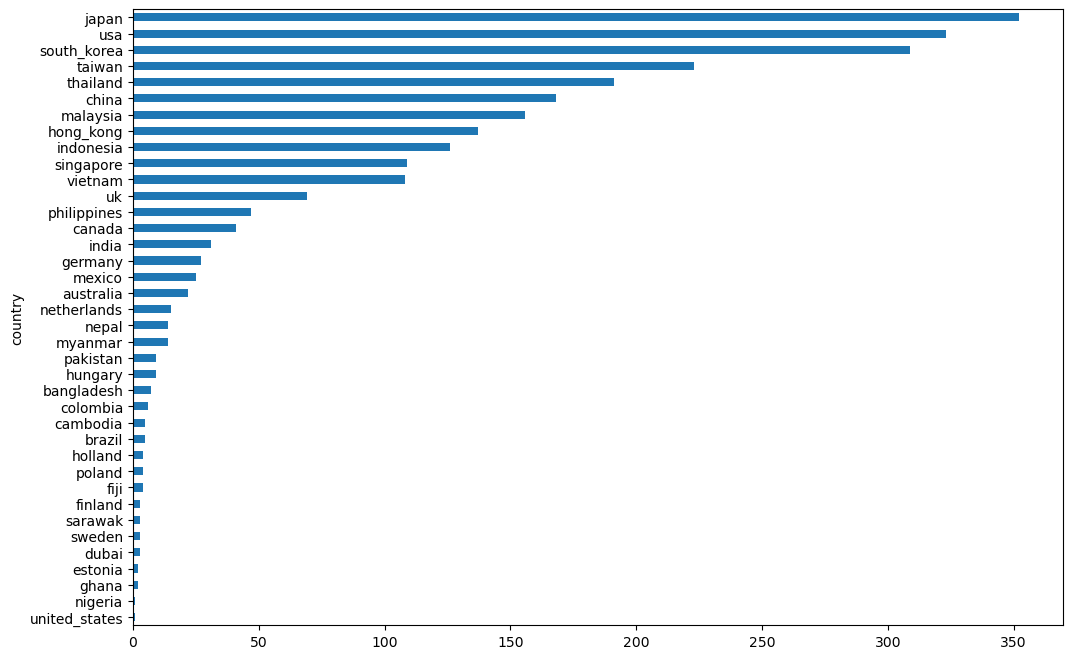

<Figure size 640x480 with 0 Axes>

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Popularidade de Ramens pelo mundo
v = df.country.value_counts()
v = v.sort_values(ascending= True)
fig, ax = plt.subplots(figsize= (12,8))
v.plot(kind='barh')
plt.show()
plt.savefig('popularidade_ramen.png')

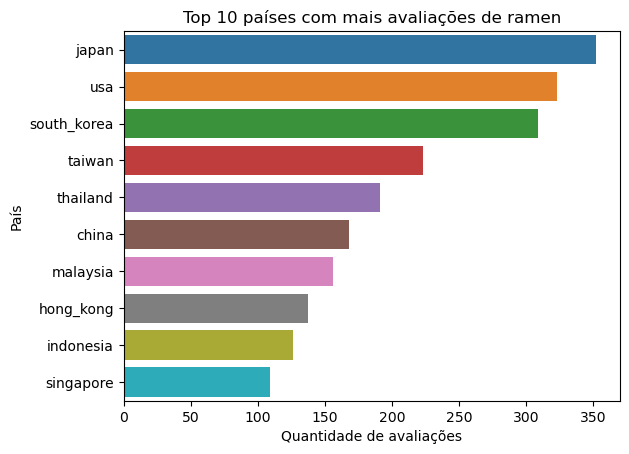

In [195]:
# Países com mais avaliações
top_countries = df['country'].value_counts().head(10)
sns.barplot(x= top_countries.values, y= top_countries.index)
plt.title("Top 10 países com mais avaliações de ramen")
plt.xlabel("Quantidade de avaliações")
plt.ylabel("País")
plt.show()

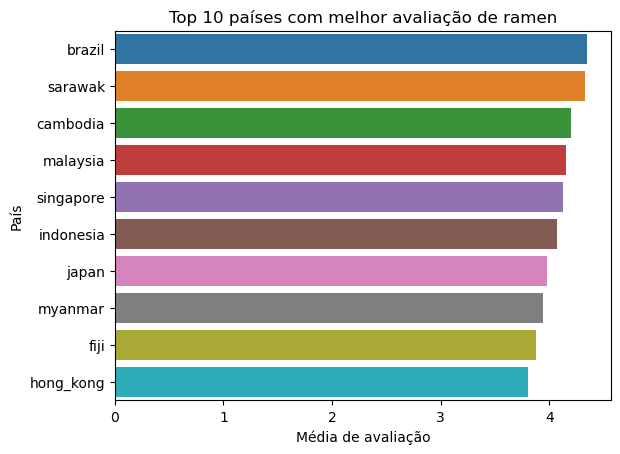

In [196]:
# Países com melhor avaliação média de ramen
country_mean_score = df.groupby('country')['stars'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=country_mean_score.values, y=country_mean_score.index)
plt.title("Top 10 países com melhor avaliação de ramen")
plt.xlabel("Média de avaliação")
plt.ylabel("País")
plt.show()

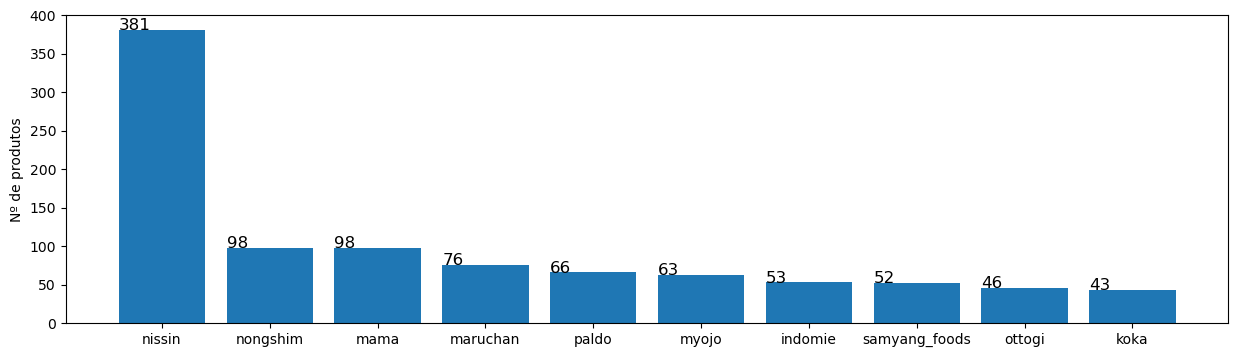

In [197]:
# Marcas populares
brands_name = df.brand.value_counts()[:10].index
brand_size = df.brand.value_counts()[:10].values

fig,ax=plt.subplots(figsize=(15,4))
ax.bar(brands_name, brand_size, data=df)
ax.set_ylabel('Nº de produtos')
for p in ax.patches:
    an=ax.annotate(str(p.get_height()), xy=(p.get_x(),p.get_height()))
    an.set_size(12)

In [198]:
# Ranking das 10 marcas mais populares
top_brands = df.brand.value_counts()[:10].index
filtered_df = df[df['brand'].isin(top_brands)]
brand_stats = filtered_df.groupby('brand')['stars'].agg(['mean', 'count', 'std'])
brand_stats = brand_stats.sort_values('mean', ascending=False).head(10)
brand_stats

,mean,count,std
brand,,,
indomie,4.070755,53,0.954968
samyang_foods,4.069231,52,0.773466
paldo,4.018939,66,0.856043
koka,4.017442,43,0.829865
nongshim,4.000000,98,0.796254
nissin,3.918570,381,0.769581
myojo,3.801587,63,0.812154
mama,3.703061,98,0.930437
maruchan,3.554276,76,0.878762


In [199]:
# Pontuação media no df
df.stars.mean()

3.654957331264546

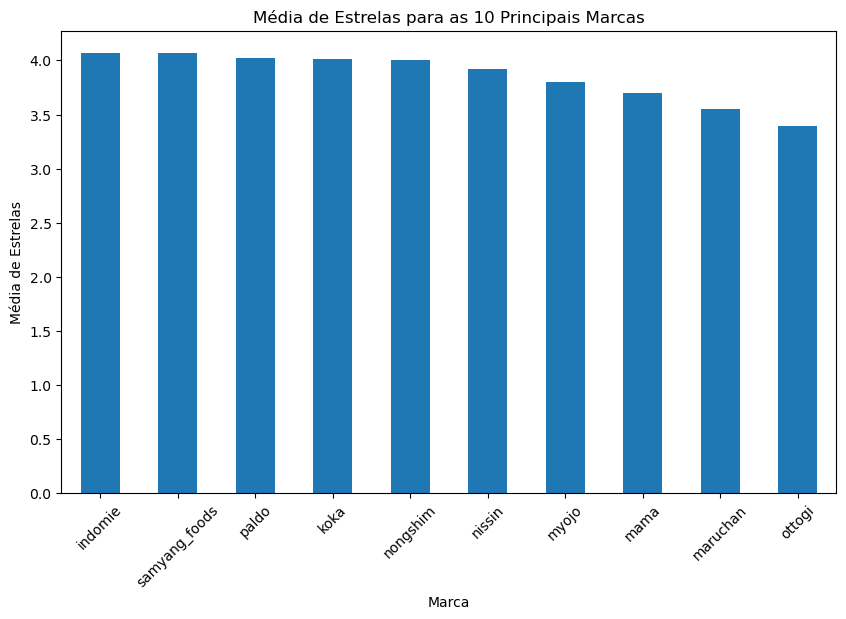

In [200]:
# Pontuação media das 10 marcas principais
brand_stats['mean'].plot(kind='bar', figsize=(10, 6), rot=45)

# Adicionar rótulos e título
plt.title('Média de Estrelas para as 10 Principais Marcas')
plt.xlabel('Marca')
plt.ylabel('Média de Estrelas')
plt.show()

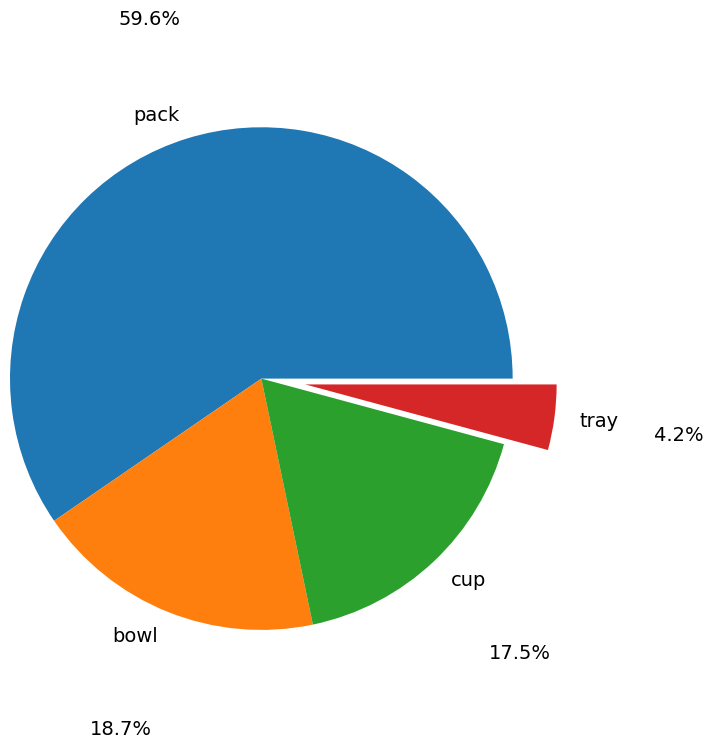

In [201]:
# Formato do Ramen mais popular 
styles = df['style'].value_counts()
plt.pie(styles[0:4],pctdistance=1.5,autopct="%2.01f%%",radius=1.7,labels= ['pack','bowl','cup','tray'],
        explode=[0,0,0,0.3],
       textprops={'fontsize': 14})
plt.show()

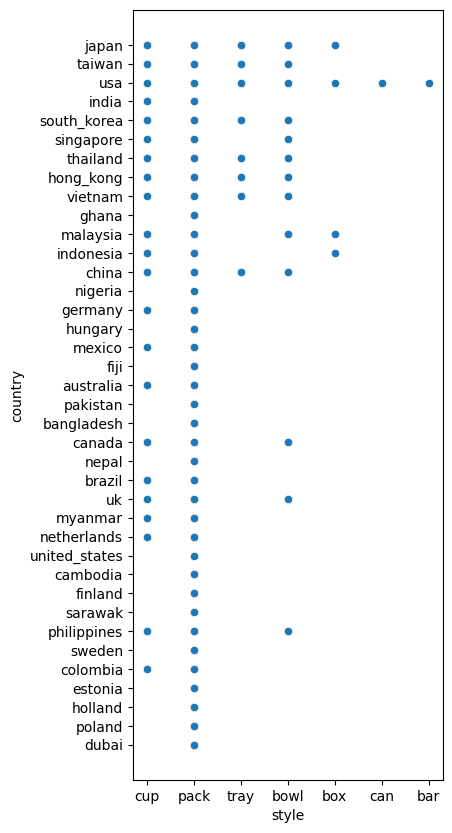

In [202]:
# Formato mais popular nos Países
a4_dims = (4, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(ax= ax, data= df,y= 'country',x= 'style')
plt.show()

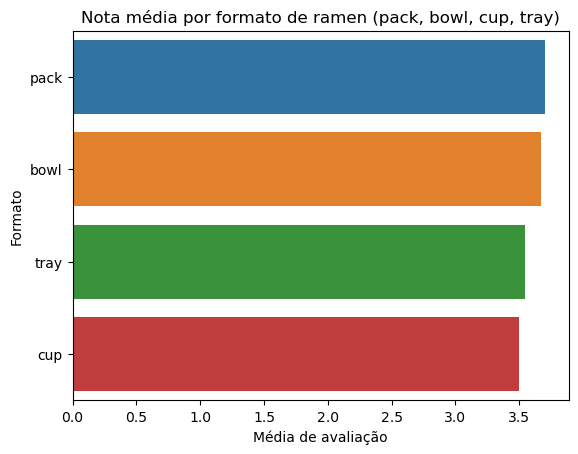

In [208]:
formatos_desejados = ['pack', 'bowl', 'cup', 'tray']
filtered_df = df[df['style'].isin(formatos_desejados)].copy()

# Calcular a nota média apenas para os formatos filtrados
style_mean = filtered_df.groupby('style')['stars'].mean().sort_values(ascending=False)

sns.barplot(x=style_mean.values, y=style_mean.index)

plt.title("Nota média por formato de ramen (pack, bowl, cup, tray)")
plt.xlabel("Média de avaliação")
plt.ylabel("Formato")
plt.show()

In [204]:
filtered_df.groupby('style')['stars'].mean()

style
bowl    3.670686
cup     3.498500
pack    3.700477
tray    3.545139
Name: stars, dtype: float64

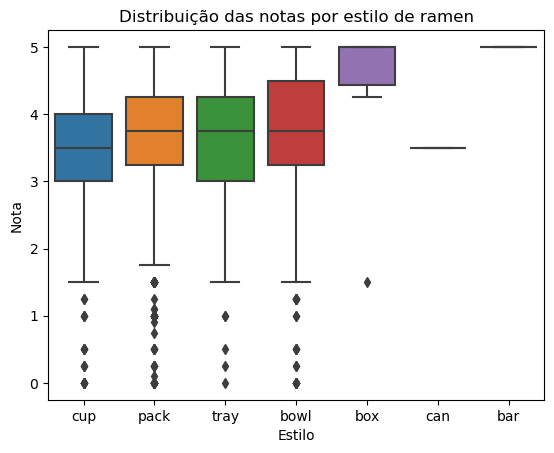

In [205]:
sns.boxplot(data=df, x='style', y='stars')
plt.title("Distribuição das notas por estilo de ramen")
plt.xlabel("Estilo")
plt.ylabel("Nota")
plt.show()

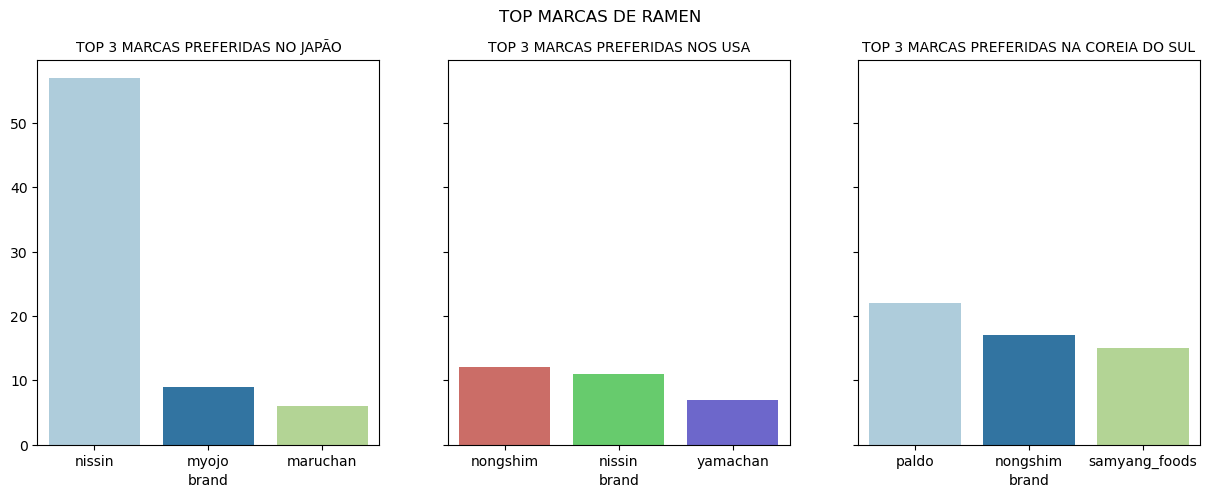

In [206]:
japan=df.loc[(df['country'] == 'japan') & (df['stars'] >= 4.5)]
usa=df.loc[(df['country'] == 'usa') & (df['stars'] >= 4.5)]
south_korea=df.loc[(df['country'] == 'south_korea') & (df['stars'] >= 4.5)]
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

fig.suptitle('TOP MARCAS DE RAMEN')

axes[0].set_title('TOP 3 MARCAS PREFERIDAS NO JAPÃO',fontsize=10)
axes[1].set_title('TOP 3 MARCAS PREFERIDAS NOS USA',fontsize=10)
axes[2].set_title('TOP 3 MARCAS PREFERIDAS NA COREIA DO SUL',fontsize=10)

# JAPAN
x_jp= japan['brand'].value_counts()
x_jp= x_jp[:3,]
sns.barplot(ax=axes[0],x=x_jp.index, y=x_jp.values,palette="Paired")

# USA
x_usa= usa['brand'].value_counts()
x_usa= x_usa[:3,]
sns.barplot(ax=axes[1],x=x_usa.index,y= x_usa.values,palette="hls")

# SOUTH KOREA
x_sk= south_korea['brand'].value_counts()
x_sk= x_sk[:3,]
sns.barplot(ax=axes[2],x=x_sk.index,y= x_sk.values,palette="Paired")
plt.show()